<a href="https://colab.research.google.com/github/suilwinglemon123/PythonSpiderNotes/blob/master/lemon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-4-d2f757c2ce21>:48: UserWarning: Glyph 32593 (\N{CJK UNIFIED IDEOGRAPH-7F51}) missing from font(s) DejaVu Sans.
  slider = Slider(slider_ax, '剪切系数', -2, 2, valinit=0.5)
<ipython-input-4-d2f757c2ce21>:48: UserWarning: Glyph 26684 (\N{CJK UNIFIED IDEOGRAPH-683C}) missing from font(s) DejaVu Sans.
  slider = Slider(slider_ax, '剪切系数', -2, 2, valinit=0.5)
<ipython-input-4-d2f757c2ce21>:48: UserWarning: Glyph 21464 (\N{CJK UNIFIED IDEOGRAPH-53D8}) missing from font(s) DejaVu Sans.
  slider = Slider(slider_ax, '剪切系数', -2, 2, valinit=0.5)
<ipython-input-4-d2f757c2ce21>:48: UserWarning: Glyph 25442 (\N{CJK UNIFIED IDEOGRAPH-6362}) missing from font(s) DejaVu Sans.
  slider = Slider(slider_ax, '剪切系数', -2, 2, valinit=0.5)
<ipython-input-4-d2f757c2ce21>:48: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) DejaVu Sans.
  slider = Slider(slider_ax, '剪切系数', -2, 2, valinit=0.5)
<ipython-input-4-d2f757c2ce21>:48: UserWarning: Glyph 24449 (\N{CJK UNIFIED IDEO

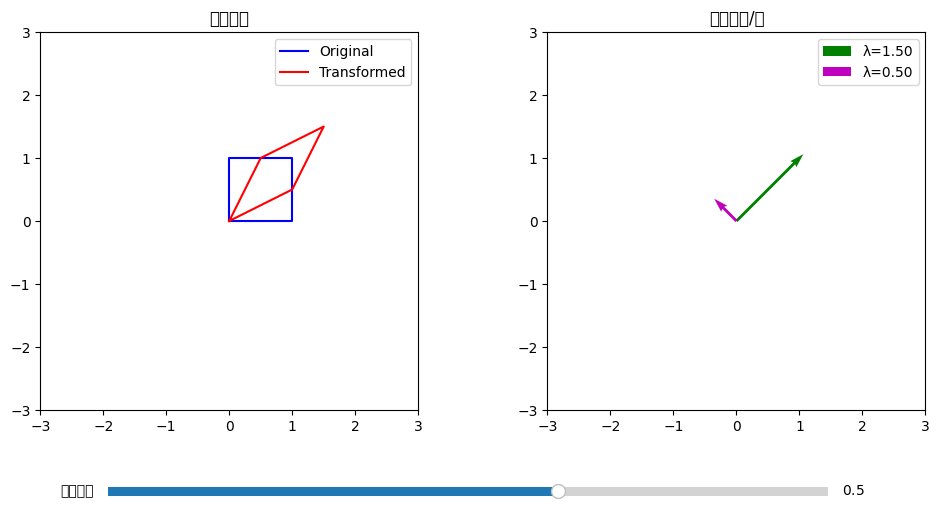

In [ ]:
# 安装必要库并配置环境
!pip install -q ipympl matplotlib numpy
from google.colab import output
output.enable_custom_widget_manager()

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

# 使用 Colab 兼容的后端
%matplotlib inline
plt.ioff()  # 关闭交互模式以避免冲突

# 初始化矩阵和图形
A = np.array([[1, 0.5], [0.5, 1]])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plt.subplots_adjust(bottom=0.25)

# 定义更新函数
def plot_transformation(matrix):
    ax1.clear()
    ax2.clear()

    # 绘制网格变换
    grid = np.array([[0,1,1,0,0], [0,0,1,1,0]])
    transformed = matrix @ grid
    ax1.plot(grid[0], grid[1], 'b-', label='Original')
    ax1.plot(transformed[0], transformed[1], 'r-', label='Transformed')
    ax1.legend()
    ax1.set(xlim=(-3, 3), ylim=(-3, 3), aspect='equal', title='网格变换')

    # 绘制特征向量
    eigvals, eigvecs = np.linalg.eig(matrix)
    colors = ['g', 'm']
    for i in range(len(eigvals)):
        vec = eigvecs[:, i] * eigvals[i]
        ax2.quiver(0, 0, vec[0], vec[1], color=colors[i],
                   angles='xy', scale_units='xy', scale=1,
                   label=f'λ={eigvals[i]:.2f}')
    ax2.set(xlim=(-3, 3), ylim=(-3, 3), aspect='equal', title='特征向量/值')
    ax2.legend()

# 首次绘制
plot_transformation(A)

# 添加交互控件（Colab 适配版）
slider_ax = plt.axes([0.2, 0.1, 0.6, 0.03])
slider = Slider(slider_ax, '剪切系数', -2, 2, valinit=0.5)

def update(val):
    k = slider.val
    new_matrix = np.array([[1, k], [k, 1]])
    plot_transformation(new_matrix)
    fig.canvas.draw()  # 手动刷新画布

slider.on_changed(update)
plt.show()